<a href="https://colab.research.google.com/github/Pratheek1027/CODSOFTT/blob/main/Codsoft_task2_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
LOADING THE DATASET

In [ ]:
import pandas as pd

df = pd.read_csv("movie.csv", encoding="latin-1")
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


CHECKING FOR THE NULL VALUES IN EACH COLUMN

In [ ]:
df.isnull().sum()


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


CLEANED THE YEAR COLUMN, MADE IT NUMERIC,FILLED THE MISSING VALUES

In [ ]:
df["Year"] = df["Year"].astype(str).str.extract(r'(\d+)', expand=False)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Year"] = df["Year"].fillna(df["Year"].median())


CLEANED THE DATA,CONVERTED TO NUMERIC AND HANDLED THE MISSING VALUES

In [ ]:
import numpy as np
df["Year"] = df["Year"].astype(str).str.extract(r'(\d+)')
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

df["Duration"] = df["Duration"].astype(str).str.extract(r'(\d+)')
df["Duration"] = pd.to_numeric(df["Duration"], errors="coerce")


df["Votes"] = df["Votes"].astype(str).str.replace(",", "")
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")

df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")


num_cols = ["Year", "Duration", "Rating", "Votes"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


cat_cols = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")


In [ ]:
df.isnull().sum()


,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:

df["Year"] = df["Year"].astype(str).str.extract(r"(\d+)")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")


df["Duration"] = df["Duration"].astype(str).str.extract(r"(\d+)")
df["Duration"] = pd.to_numeric(df["Duration"], errors="coerce")


df["Votes"] = df["Votes"].astype(str).str.replace(",", "")
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")


df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")


In [ ]:
df.dtypes


,0
Name,object
Year,int64
Duration,int64
Genre,object
Rating,float64
Votes,float64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


GRAPH FOR DISTRIBUTION OF MOVIE RATINGS

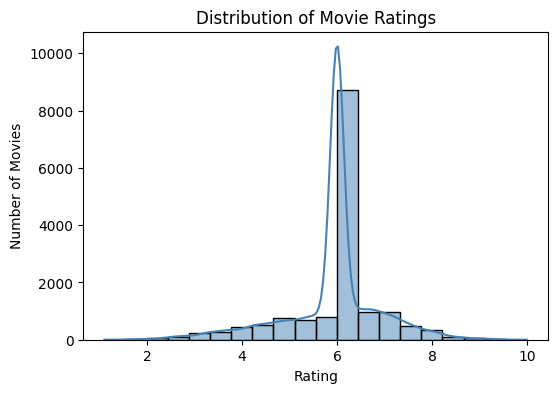

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=20, kde=True, color='steelblue')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()


GRAPH FOR AVERAGE RATING BY GENRE

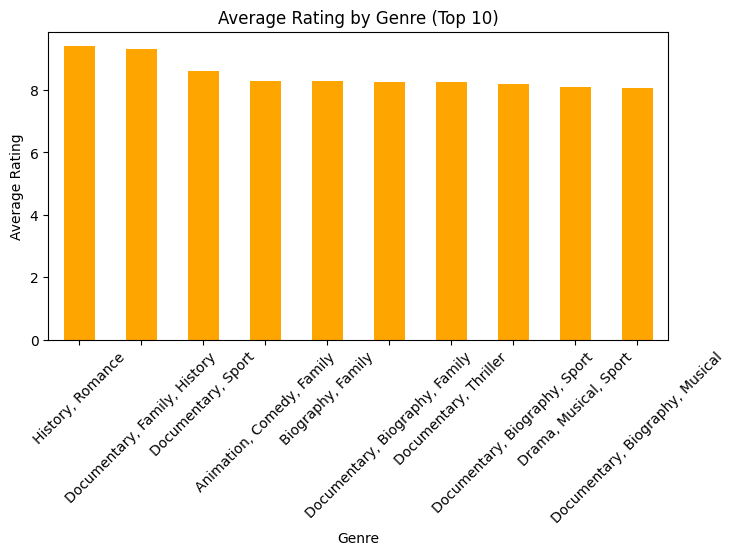

In [ ]:
top_genres = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
top_genres.plot(kind='bar', color='orange')
plt.title("Average Rating by Genre (Top 10)")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


GRAPH FOR MOVIE RATINGS VS NO.OF VOTES

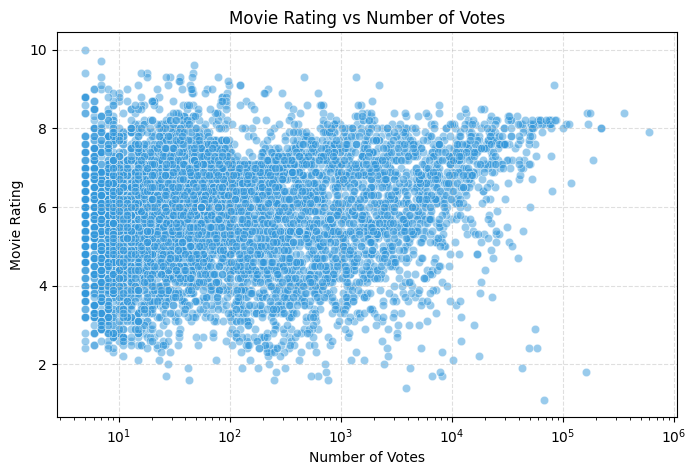

In [ ]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    data=df,
    x='Votes',
    y='Rating',
    alpha=0.5,
    color='#3498db'
)

plt.xlabel("Number of Votes")
plt.ylabel("Movie Rating")
plt.title("Movie Rating vs Number of Votes")

plt.xscale('log')
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()


GRAPH FOR MOVIE DURATION  DISTRIBUTION

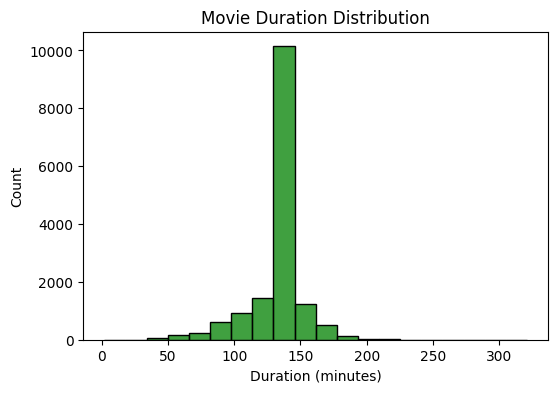

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Duration'], bins=20, color='green')
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


GRAPH FOR TOP DIRECTORS BY AVERAGE RATING

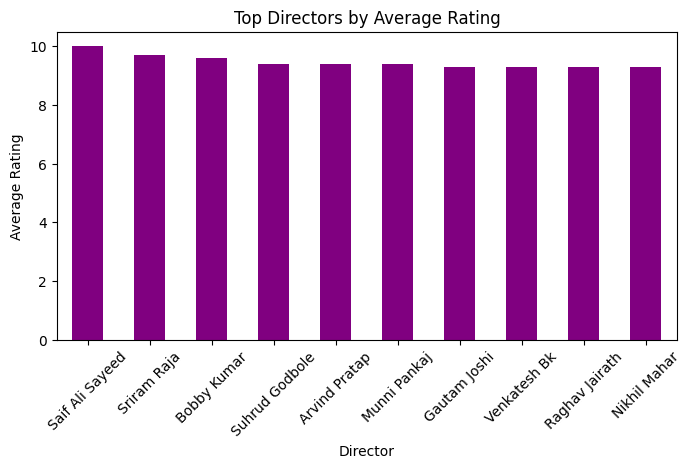

In [ ]:
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
top_directors.plot(kind='bar', color='purple')
plt.title("Top Directors by Average Rating")
plt.xlabel("Director")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


SEPARATING DATA INTO INPUT AND OUTPUT

In [ ]:
X = df.drop("Rating", axis=1)
y = df["Rating"]


CONVERTING THE TEXT DATA INTO NUMERIC SO THAT MODEL CAN UNDERSTAND

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = ["Name", "Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]

for col in cat_cols:
    X[col] = le.fit_transform(X[col])


In [ ]:
X.dtypes


,0
Name,int64
Year,int64
Duration,int64
Genre,int64
Votes,float64
Director,int64
Actor 1,int64
Actor 2,int64
Actor 3,int64


TRAIN AND SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


CREATING THE MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

OBTAINING THE MSE AND R^2 VALUES

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.6401475110412636
R² Score: 0.3416895367826851


PREDICTING THE RATING FOR A PARTICULAR MOVIE

In [ ]:
sample_movie = X.iloc[[0]]
predicted_rating = model.predict(sample_movie)

print("Predicted Rating:", predicted_rating[0])


Predicted Rating: 5.9625
